<a href="https://www.kaggle.com/code/vidhikishorwaghela/keystroke-analysis-for-essay-quality-rf-mse-0-4?scriptVersionId=145329243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing Typing Behavior: A Data-Driven Approach to Predicting Essay Quality
 
##  Importing Necessary Libraries:
 
* Importing essential libraries for data manipulation, visualization, and machine learning.

In [1]:
#Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Training Data:

* Reading two CSV files containing training data: train_logs with writing process information and train_scores with essay scores.

In [2]:
# Load the training data
train_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_scores = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')

## Merging Logs and Scores:

* Merging the two datasets based on the unique essay ID.

In [3]:
# Merge logs and scores based on essay ID
train_data = pd.merge(train_logs, train_scores, on='id')

## Feature Engineering for Typing Behavior:

* Creating new features related to typing behavior by aggregating data at the essay level.

In [4]:
# Feature engineering for typing behavior features
typing_features = train_data.groupby('id').agg({
    'activity': 'count',                # Total number of activities
    'action_time': ['sum', 'mean'],     # Total and average action time
    'word_count': 'max',                # Maximum word count
    'text_change': 'nunique',           # Number of unique text changes
    'cursor_position': 'mean'           # Average cursor position
})

## Flatten the Multi-Level Column Index:

* Flattening the multi-level column index for ease of use.

In [5]:
# Flatten the multi-level column index
typing_features.columns = ['_'.join(col).strip() for col in typing_features.columns.values]


## Merging Typing Features with Scores:

* Merging the typing behavior features with essay scores.

In [6]:
# Merge typing features with scores
features = typing_features.merge(train_scores, on='id')

## Scatter Plots for Visualization:

* Creating scatter plots to visualize the relationship between typing behavior features and essay scores.

Index(['id', 'activity_count', 'action_time_sum', 'action_time_mean',
       'word_count_max', 'text_change_nunique', 'cursor_position_mean',
       'score'],
      dtype='object')


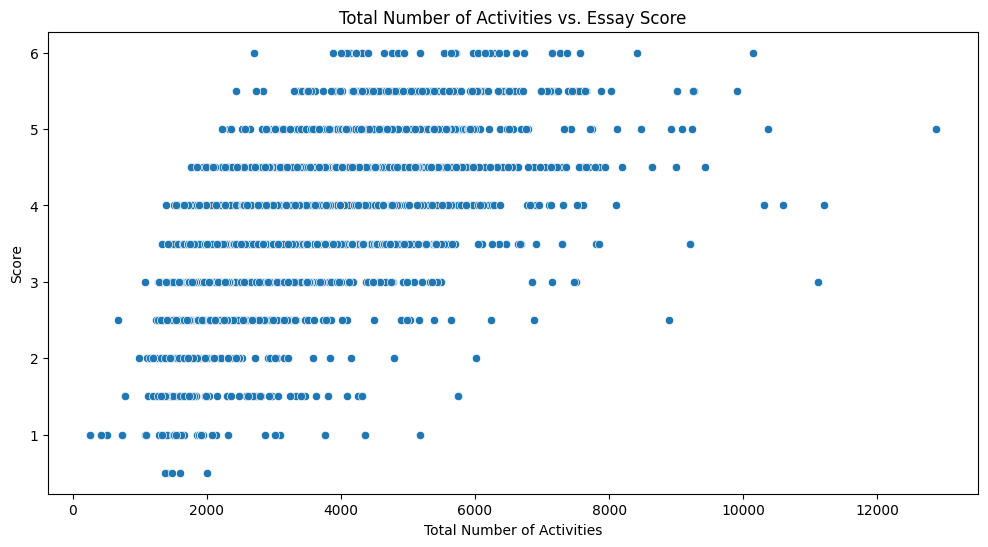

In [7]:
# Print the column names
print(features.columns)

# Visualizations
plt.figure(figsize=(12, 6))
sns.scatterplot(x='activity_count', y='score', data=features)
plt.title('Total Number of Activities vs. Essay Score')
plt.xlabel('Total Number of Activities')
plt.ylabel('Score')
plt.show()


Index(['id', 'activity_count', 'action_time_sum', 'action_time_mean',
       'word_count_max', 'text_change_nunique', 'cursor_position_mean',
       'score'],
      dtype='object')


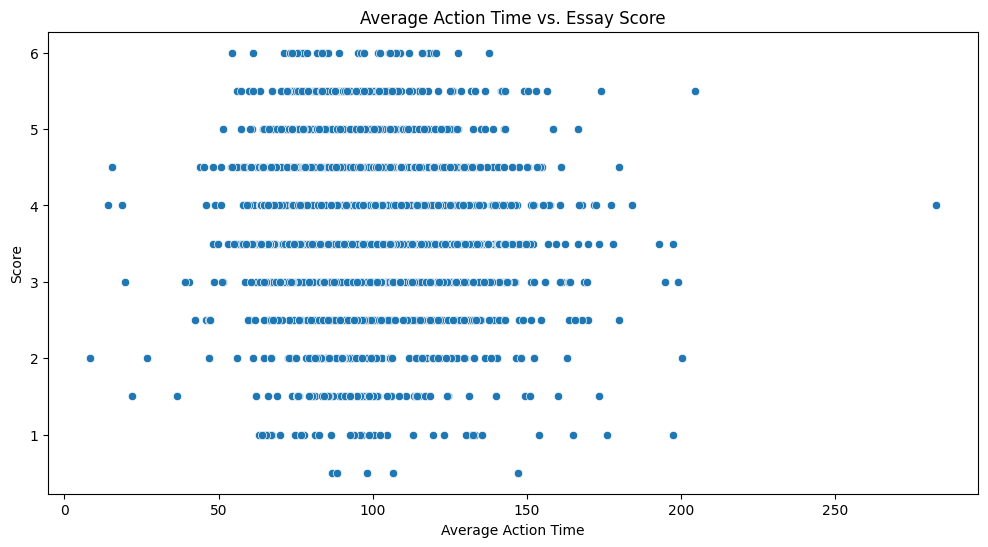

In [8]:
# Average action time vs. score
print(features.columns)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='action_time_mean', y='score', data=features)
plt.title('Average Action Time vs. Essay Score')
plt.xlabel('Average Action Time')
plt.ylabel('Score')
plt.show()


Index(['id', 'activity_count', 'action_time_sum', 'action_time_mean',
       'word_count_max', 'text_change_nunique', 'cursor_position_mean',
       'score'],
      dtype='object')


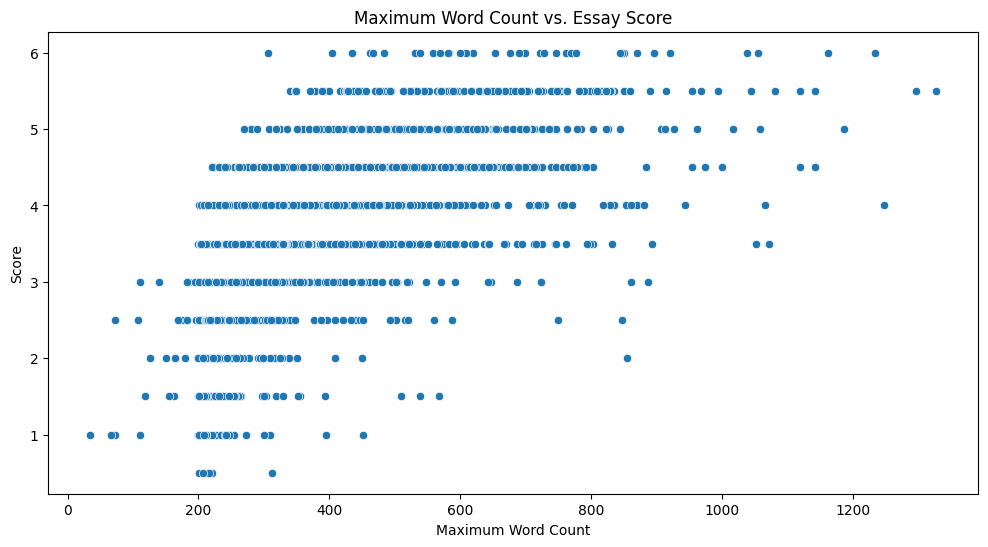

In [9]:
# Maximum word count vs. score
print(features.columns)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='word_count_max', y='score', data=features)
plt.title('Maximum Word Count vs. Essay Score')
plt.xlabel('Maximum Word Count')
plt.ylabel('Score')
plt.show()


Index(['id', 'activity_count', 'action_time_sum', 'action_time_mean',
       'word_count_max', 'text_change_nunique', 'cursor_position_mean',
       'score'],
      dtype='object')


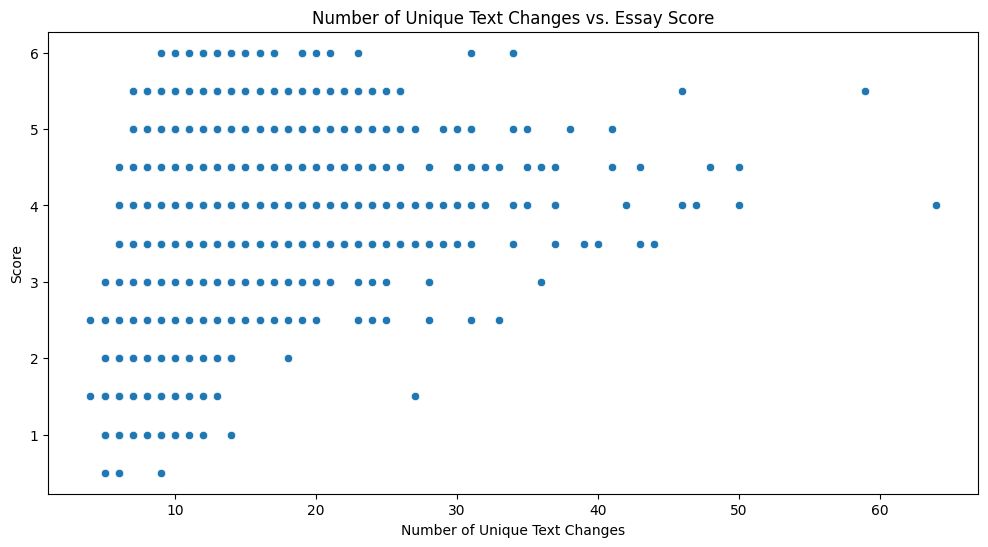

In [10]:
# Number of unique text changes vs. score
print(features.columns)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='text_change_nunique', y='score', data=features)
plt.title('Number of Unique Text Changes vs. Essay Score')
plt.xlabel('Number of Unique Text Changes')
plt.ylabel('Score')
plt.show()


Index(['id', 'activity_count', 'action_time_sum', 'action_time_mean',
       'word_count_max', 'text_change_nunique', 'cursor_position_mean',
       'score'],
      dtype='object')


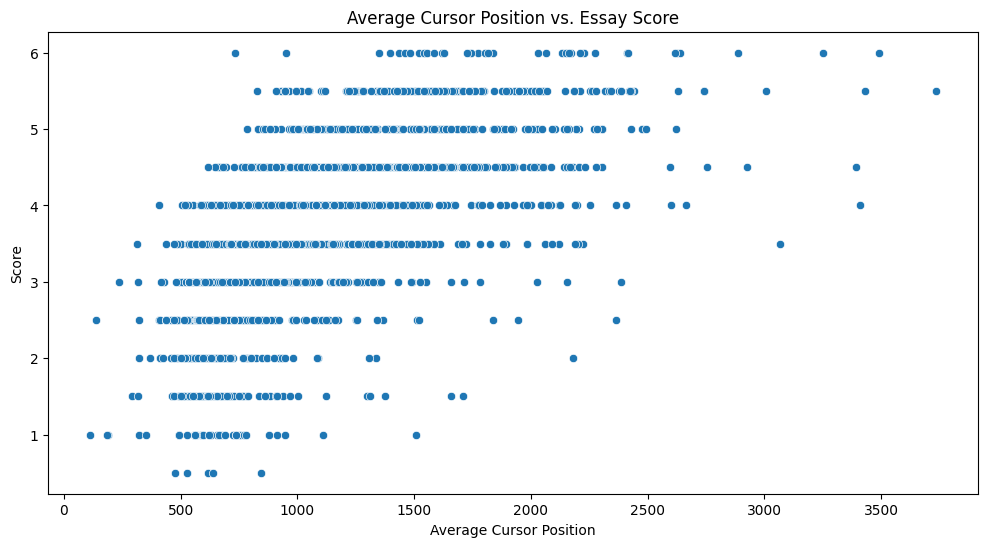

In [11]:
# Average cursor position vs. score
print(features.columns)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cursor_position_mean', y='score', data=features)
plt.title('Average Cursor Position vs. Essay Score')
plt.xlabel('Average Cursor Position')
plt.ylabel('Score')
plt.show()


## Splitting Data into Training and Validation Sets:

* Splitting the data into training and validation sets.


In [12]:
# Split data into training and validation sets
train_set, val_set = train_test_split(features, test_size=0.2, random_state=42)

In [13]:
# Define features and target
X_train = train_set.drop(['id', 'score'], axis=1)
y_train = train_set['score']
X_val = val_set.drop(['id', 'score'], axis=1)
y_val = val_set['score']

## Training a Random Forest Model:

* Using a Random Forest Regressor to train a model on the training set.

In [14]:
# Train a model (Random Forest as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Making Predictions on the Validation Set:

* Using the trained model to make predictions on the validation set.


In [15]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

## Evaluating the Model:

* Calculating and printing the Mean Squared Error on the validation set to evaluate the model's performance.


In [16]:
# Evaluate the model
mse = mean_squared_error(y_val, val_predictions)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 0.423654797979798


## Making Predictions on the Test Set:

* Loading the test data, performing the same feature engineering, and making predictions on the test set.

In [17]:
# Now, you can use the trained model to make predictions on the test set
# Load the test data
test_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv')

In [18]:
# Perform the same feature engineering on the test set
test_typing_features = test_logs.groupby('id').agg({
    'activity': 'count',
    'action_time': ['sum', 'mean'],
    'word_count': 'max',
    'text_change': 'nunique',
    'cursor_position': 'mean'
})

In [19]:
# Flatten the multi-level column index
test_typing_features.columns = ['_'.join(col).strip() for col in test_typing_features.columns.values]

In [20]:
# Make predictions on the test set
test_predictions = model.predict(test_typing_features)

## Creating a Submission File:

* Creating a submission file containing essay IDs and predicted scores for the test set.

In [21]:
# Create a submission file
submission = pd.DataFrame({'id': test_typing_features.index, 'score': test_predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)

## Residual Plot, Feature Importance, and Distribution of Predicted Scores:

* Additional visualizations after model training, including a residual plot, feature importance plot, and distribution of predicted scores.


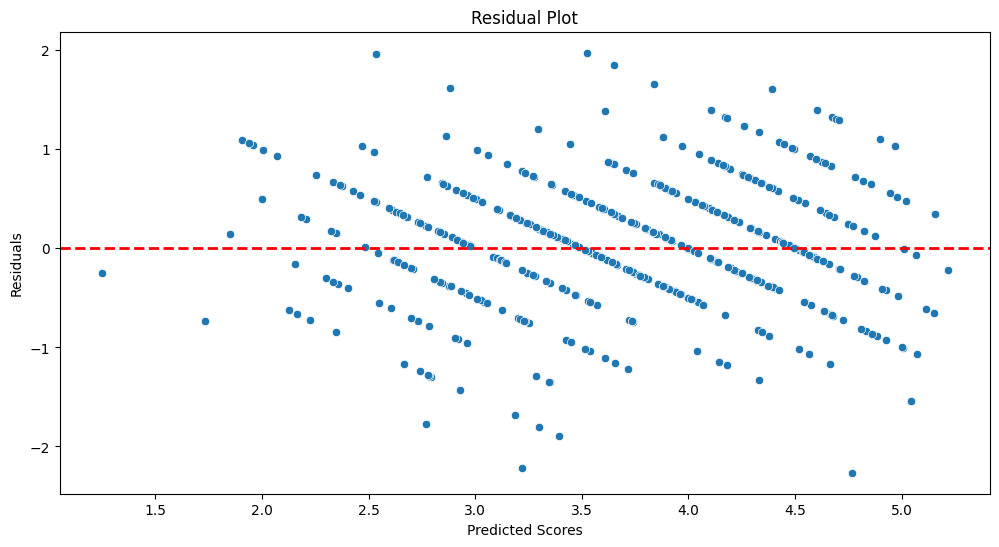

In [22]:
# Residual plot
residuals = y_val - val_predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=val_predictions, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()


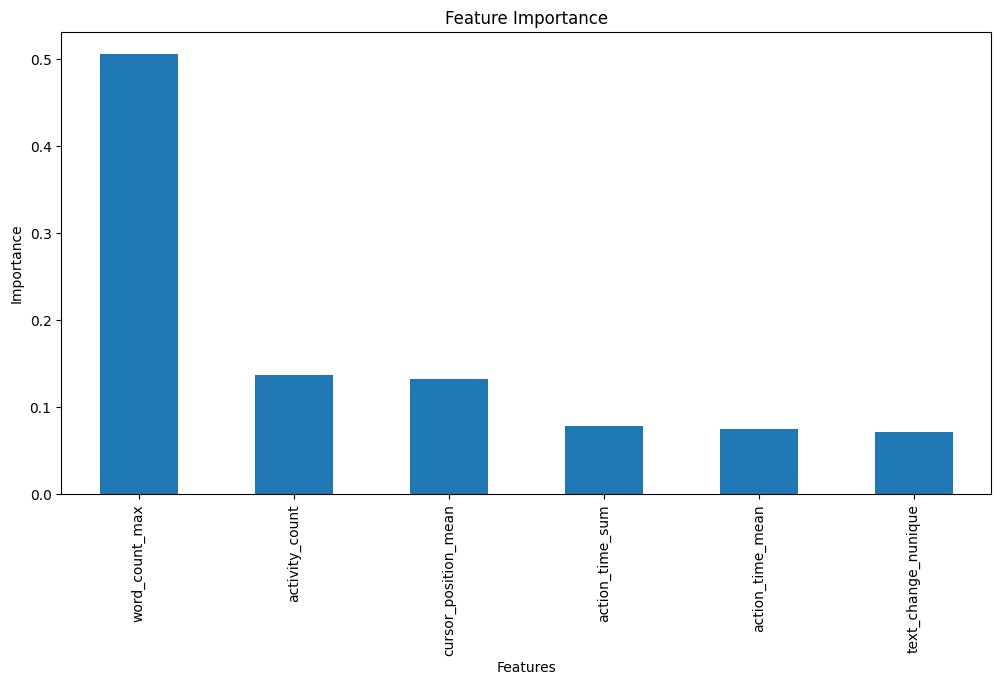

In [23]:
# Feature importance plot
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


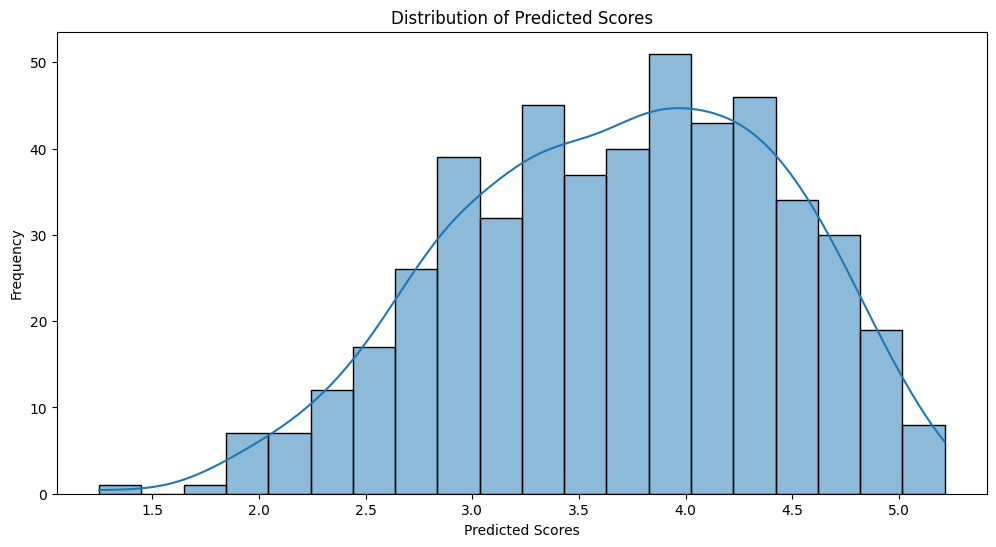

In [24]:
# Distribution of predicted scores
plt.figure(figsize=(12, 6))
sns.histplot(val_predictions, bins=20, kde=True)
plt.title('Distribution of Predicted Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Frequency')
plt.show()
